# LAB-7
B.Sai Varun

BL.EN.U4AIE21026

In [1]:
import numpy as np
import librosa
from hmmlearn import hmm

In [2]:
def extract_features(file_path, n_mfcc=13, n_fft=2048, hop_length=512):
    # Load audio file
    y, sr = librosa.load(file_path)
    # Extract STFT features
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # Concatenate STFT and MFCC features
    features = np.concatenate([stft, mfccs], axis=0)
    return features.T
file_path = "AI in speech processing.wav"
features = extract_features(file_path)
n_components = 3  # Number of states in HMM
covariance_type = "full"
model = hmm.GaussianHMM(n_components=n_components, covariance_type=covariance_type, n_iter=1000)
model.fit(features)

Fitting a model with 1620845 free scalar parameters with only 185802 data points will result in a degenerate solution.


GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

In [3]:
predicted_states = model.predict(features)
print("Predicted states sequence:", predicted_states)

Predicted states sequence: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


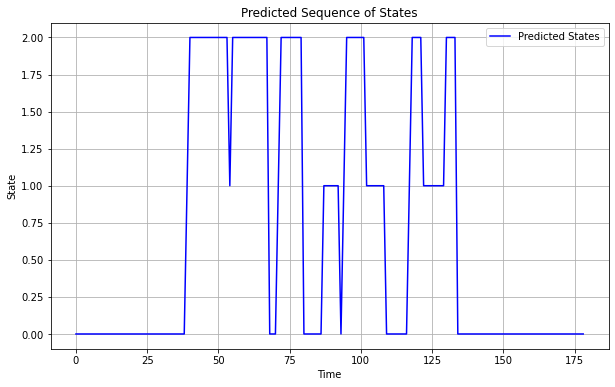

In [4]:
import matplotlib.pyplot as plot
plot.figure(figsize=(10, 6))
plot.plot(predicted_states, label='Predicted States', color='blue')
plot.xlabel('Time')
plot.ylabel('State')
plot.title('Predicted Sequence of States')
plot.legend()
plot.grid(True)
plot.show()